In [1]:
import numpy as np
import pandas as pd

In [199]:
data = pd.read_csv('Global_Superstore2.csv')

In [3]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
data.drop('Postal Code',axis=1,inplace=True)

In [6]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [43]:
import datetime

In [44]:
data['year'] = pd.DatetimeIndex(data['Order Date']).year

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Consumer Analysis

In [104]:
df = data.groupby(['Segment','year'])['Profit'].agg(['sum','count'])

In [92]:
#frequency of purchase by each customer
df2 = data[['Customer Name','Row ID','Profit']].groupby('Customer Name')['Profit'].agg(['sum','count'])

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

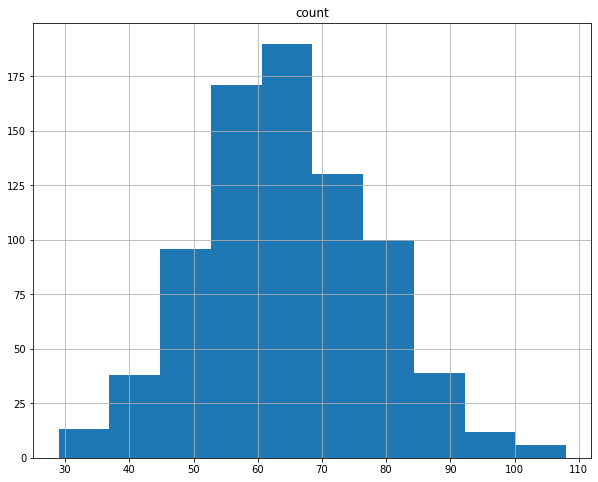

In [93]:
#frequency bins
df2.hist('count', bins = 10, figsize = (10,8))

In [94]:
conditions = [
    (df2['count'] <= 40),
    (df2['count'] > 40) & (df2['count'] <= 60),
    (df2['count'] > 60) & (df2['count'] <= 80),
    (df2['count'] > 80)
    ]

In [95]:
values = ['very low','low','high','very high']

In [96]:
df2['bins']=np.select(conditions,values)

In [97]:
df2[df2['bins']=='very high'].sum()

sum                                           256898.71678
count                                                 8897
bins     very highvery highvery highvery highvery highv...
dtype: object

In [98]:
#customers with frequency of 60 to 80 are contributing more than high frequncy customers
df2.groupby('bins').sum()

,sum,count
bins,,
high,735756.04090,25992
low,454277.10468,15645
very high,256898.71678,8897
very low,20525.42892,756


In [105]:
#Consumer segment contributes more than any other sector and each year the value is increasing.
df

sum  count
Segment     year                     
Consumer    2011  117337.49406   4707
            2012  165799.19094   5785
            2013  208427.73398   7091
            2014  257675.36308   8935
Corporate   2011   84746.93574   2733
            2012   90556.69992   3279
            2013  125707.93908   4205
            2014  140196.75392   5212
Home Office 2011   46856.38174   1558
            2012   51059.38824   1898
            2013   72799.55712   2503
            2014  106293.85346   3384

In [107]:
df3 = data[['Country','Customer Name','year','Profit']].groupby('Country')['Profit'].agg(['sum','count'])

In [112]:
#contribution by customers based on the frequency across countries
df3.sort_values(by = 'count', ascending = False).head(15)

,sum,count
Country,,
United States,286397.02170,9994
Australia,103907.43300,2837
France,109029.00300,2827
Mexico,102818.09752,2644
Germany,107322.82050,2065
China,150683.08500,1880
United Kingdom,111900.15000,1633
Brazil,30090.49896,1599
India,129071.83500,1555


In [113]:
#contribution by customers based on the profit across countries
df3.sort_values(by = 'sum', ascending = False).head(15)

,sum,count
Country,,
United States,286397.02170,9994
China,150683.08500,1880
India,129071.83500,1555
United Kingdom,111900.15000,1633
France,109029.00300,2827
Germany,107322.82050,2065
Australia,103907.43300,2837
Mexico,102818.09752,2644
Spain,54390.12000,859


Product Analysis

In [149]:
d = data[['Category','Sub-Category','Sales','Profit','year']].groupby(['Sub-Category','year']).sum()

In [152]:
d.sort_values(by = ['year','Profit'], ascending = False).head(5)

,,Sales,Profit
Sub-Category,year,,
Copiers,2014,550384.89376,104048.53596
Phones,2014,552006.38010,70657.64130
Bookcases,2014,513196.70630,63219.05050
Appliances,2014,359786.78420,53040.50050
Accessories,2014,253488.16360,41593.92860


In [157]:
d1=d.groupby('year').apply(lambda x: x.sort_values(['Profit'],ascending = False))

In [158]:
#top 5 profit making product types on yearly basis
d1.groupby('year').head(5)

Sales        Profit
year Sub-Category year                            
2011 Phones       2011  337282.48020   53927.48950
     Copiers      2011  216367.89214   30375.09344
     Chairs       2011  285730.97610   29943.15710
     Bookcases    2011  259396.28580   27518.85750
     Appliances   2011  173383.42640   22838.44130
2012 Copiers      2012  327168.59880   51843.22760
     Phones       2012  364016.27440   45223.04980
     Accessories  2012  172397.68500   33507.10020
     Chairs       2012  295058.13960   28755.34670
     Bookcases    2012  317953.44980   28137.26710
2013 Copiers      2013  415514.88858   72300.69118
     Phones       2013  453519.00450   46908.82520
     Bookcases    2013  376025.79990   43049.24440
     Appliances   2013  254951.12950   41485.51600
     Chairs       2013  427514.37320   40449.49210
2014 Copiers      2014  550384.89376  104048.53596
     Phones       2014  552006.38010   70657.64130
     Bookcases    2014  513196.70630   63219.05050
     Appliances   2014  359786.78420   53040.50050
     Accessories  2014  253488.16360   41593.92860

In [226]:
from datetime import date
data['Order Date']=pd.to_datetime(data['Order Date'],format='%d-%m-%Y')
data['Ship Date']=pd.to_datetime(data['Ship Date'],format='%d-%m-%Y')

In [228]:
data['no. of days']= (data['Ship Date']-data['Order Date']).astype('timedelta64[D]')

In [229]:
#average delivery time across countries
d2 = data[['no. of days','Country']].groupby('Country').mean()

<AxesSubplot:xlabel='Country'>

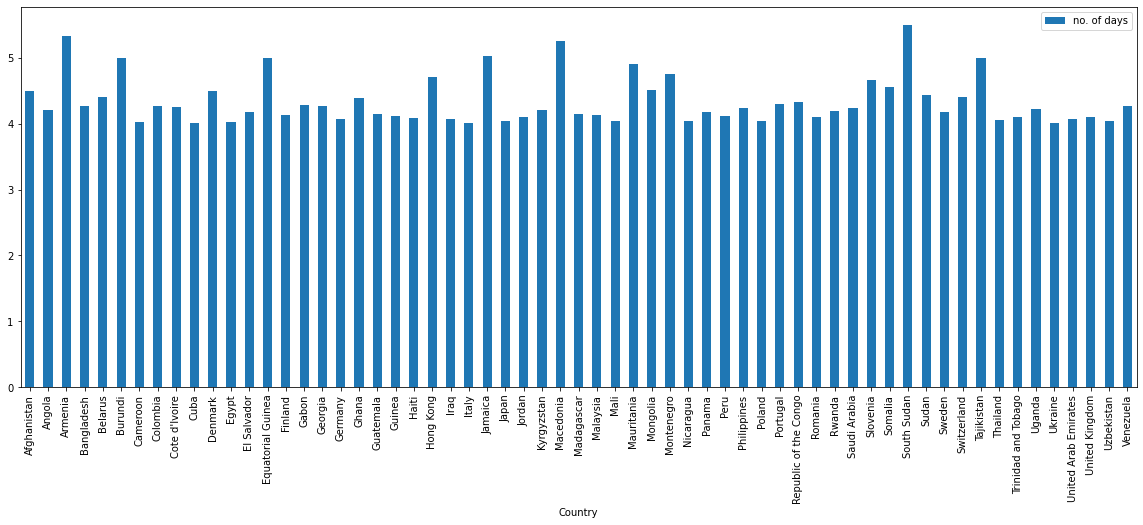

In [237]:
d2[d2['no. of days']>4].plot(kind = 'bar', figsize =(20,7))

In [236]:
d2[d2['no. of days']>5]

,no. of days
Country,
Armenia,5.333333
Jamaica,5.032258
Macedonia,5.250000
South Sudan,5.500000
